# We will build a machine learning model using SciKit Learn  to predict whether  an individual will have a stroke. 

# In our initial data analysis, we noticed that individuals who had a stroke make up 5.2% of the data. We will use Synthetic Minority Oversampling Technique (SMOTE) to over-sample our minority class (stroke patients)

# We tested the model with and without SMOTE to see if our scores differed.

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from collections import Counter

# Import SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
# Reading the csv
df = pd.read_csv("clean_data/stroke_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


### Dropping irrelevant Columns

In [3]:
# Re-TEST dropping columns - Remove gender, age, married, work_type, residence type
modified_df = df.drop(columns=["gender","age","ever_married","work_type","Residence_type"])
modified_df.head()

,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,228.69,36.6,formerly smoked,1
1,0,1,105.92,32.5,never smoked,1
2,0,0,171.23,34.4,smokes,1
3,1,0,174.12,24.0,never smoked,1
4,0,0,186.21,29.0,formerly smoked,1


In [4]:
# # Get Dummies
# machine_ready_df = pd.get_dummies(modified_df, columns=["hypertension", "heart_disease","smoking_status"])
# machine_ready_df.head()

# Only Dummifying smoking_status. Did not get_dummies the other columns since already encoded to reduce multicollinearity
machine_ready_df = pd.get_dummies(modified_df, columns=["smoking_status"])
machine_ready_df.head()

,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,228.69,36.6,1,0,1,0,0
1,0,1,105.92,32.5,1,0,0,1,0
2,0,0,171.23,34.4,1,0,0,0,1
3,1,0,174.12,24.0,1,0,0,1,0
4,0,0,186.21,29.0,1,0,1,0,0


In [5]:
#Creating FEATURES & LABEL
X = machine_ready_df.drop(["stroke"], axis=1)
y = machine_ready_df["stroke"].values.reshape(-1,1)

### Train Data

In [6]:
# Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

# Scaler for features
X_scaler = StandardScaler().fit(X_train)

# Scale Features
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fit & score the logisticRegress Classifier
# clf = LogisticRegression(solver='liblinear', penalty='l2', C=0.00005)
clf = LogisticRegression()
clf = clf.fit(X=X_train_scaled, y=y_train.ravel())
score = clf.score(X_test_scaled,y_test)
pred = clf.predict(X_test_scaled)

TESTING SCORE: 0.935142


<AxesSubplot:>

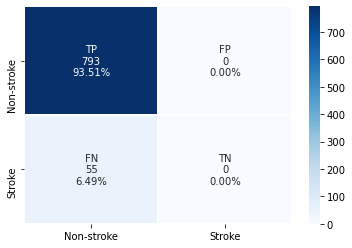

In [7]:
#Confusion Matrix
print('TESTING SCORE: %f' % score)
cm = confusion_matrix(y_test,pred)
group_names = ['TP', 'FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
x_categories = ['Non-stroke', 'Stroke']
y_categories = ['Non-stroke', 'Stroke']

sns.heatmap(cm, linewidths=1, annot=labels, xticklabels=x_categories, yticklabels=y_categories, fmt='', cmap="Blues")

## Confusion Matrix Analysis
#### - From our test sample of 848 patients, the model predicted 793 patients as true-positives with 0 false-positives. The model also predicted 55 patients as false-negative, meaning it incorrectly predicted these patients as high-risk when they are actually low.
#### - As a result of our imbalanced minority class being stroke, the model was unable to predict any patients at risk for stroke.

In [8]:
# Classification report
target_names = ['Non-Stroke', 'Stroke']
matrix = classification_report(y_test,pred, target_names=target_names)
print(matrix)

              precision    recall  f1-score   support

  Non-Stroke       0.94      1.00      0.97       793
      Stroke       0.00      0.00      0.00        55

    accuracy                           0.94       848
   macro avg       0.47      0.50      0.48       848
weighted avg       0.87      0.94      0.90       848



C:\Users\cupan\.conda\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cupan\.conda\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cupan\.conda\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Train w/ SMOTE

In [9]:
# Using SMOTE to synthetically over-sample minority class to match majority class
# Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

#SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy=0.2, k_neighbors=3)
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train.astype('float'), y_train.ravel())
y_train_SMOTE = y_train_SMOTE.reshape(-1,1)

# Create Scaler for features
X_SMOTE_scaler = StandardScaler().fit(X_train_SMOTE)

# Scale & transform Features
X_train_SMOTE_scaled = X_SMOTE_scaler.transform(X_train_SMOTE)
X_test_SMOTE_scaled = X_SMOTE_scaler.transform(X_test)

# Fit & score the logisticRegress Classifier
clf = LogisticRegression()
clf = clf.fit(X=X_train_SMOTE_scaled, y=y_train_SMOTE.ravel())
score = clf.score(X_test_SMOTE_scaled,y_test)
pred = clf.predict(X_test_SMOTE_scaled)

TESTING SCORE: 0.911557


<AxesSubplot:>

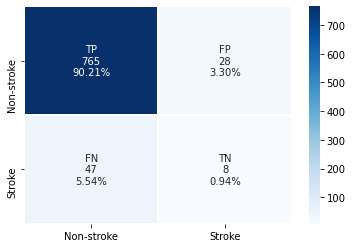

In [10]:
#Confusion Matrix
print('TESTING SCORE: %f' % score)
cm = confusion_matrix(y_test,pred)
group_names = ['TP', 'FP','FN','TN']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
x_categories = ['Non-stroke', 'Stroke']
y_categories = ['Non-stroke', 'Stroke']

sns.heatmap(cm, linewidths=1, annot=labels, xticklabels=x_categories, yticklabels=y_categories, fmt='', cmap="Blues")

## Confusion Matrix Analysis
#### - Out of 848 patients, the model predicted 793 non-stroke patients as positives, but 28 patients were false-positives, meaning, they were actually at risk for stroke.
#### - 55 out of 848 patients were determined as negatives, but 8 patients were true-negatives. The 47 patients predicted as high risk were actually at a low risk of stroke.

In [11]:
# Classification report
target_names = ['Non-Stroke', 'Stroke']
matrix = classification_report(y_test,pred, target_names=target_names)
print(matrix)

              precision    recall  f1-score   support

  Non-Stroke       0.94      0.96      0.95       793
      Stroke       0.22      0.15      0.18        55

    accuracy                           0.91       848
   macro avg       0.58      0.56      0.56       848
weighted avg       0.90      0.91      0.90       848

